In [1]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from math import sqrt


In [2]:
# Create your connection.

cnx = sqlite3.connect(r'database.sqlite')

table = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", cnx)


In [3]:
table

,name
0,sqlite_sequence
1,Player_Attributes
2,Player
3,Match
4,League
5,Country
6,Team
7,Team_Attributes


In [4]:
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx,parse_dates = ['date'])

df.head()


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   183978 non-null  int64         
 1   player_fifa_api_id   183978 non-null  int64         
 2   player_api_id        183978 non-null  int64         
 3   date                 183978 non-null  datetime64[ns]
 4   overall_rating       183142 non-null  float64       
 5   potential            183142 non-null  float64       
 6   preferred_foot       183142 non-null  object        
 7   attacking_work_rate  180748 non-null  object        
 8   defensive_work_rate  183142 non-null  object        
 9   crossing             183142 non-null  float64       
 10  finishing            183142 non-null  float64       
 11  heading_accuracy     183142 non-null  float64       
 12  short_passing        183142 non-null  float64       
 13  volleys       

As we are predicting the overall rating of soccer player, overall_rating column will be the target column.

Here we have preferred_foot,defensive_work_rate ,attacking_work_rate are categorical features.

Lets check for any null values in the target column and basic statistical information of that column

In [6]:
target = df['overall_rating']
target.isna().sum()

836

In [7]:
target.describe()

count    183142.000000
mean         68.600015
std           7.041139
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([7.0000e+00, 6.0000e+00, 2.0000e+01, 6.5000e+01, 9.4000e+01,
        1.4200e+02, 2.9400e+02, 5.2600e+02, 1.2510e+03, 1.8450e+03,
        2.5780e+03, 4.0870e+03, 6.1890e+03, 9.6500e+03, 1.3745e+04,
        1.8366e+04, 2.0310e+04, 2.0773e+04, 1.9382e+04, 1.8784e+04,
        1.5915e+04, 1.1254e+04, 7.5250e+03, 4.9470e+03, 2.8290e+03,
        1.4590e+03, 7.4800e+02, 2.2800e+02, 8.4000e+01, 3.9000e+01]),
 array([33.        , 35.03333333, 37.06666667, 39.1       , 41.13333333,
        43.16666667, 45.2       , 47.23333333, 49.26666667, 51.3       ,
        53.33333333, 55.36666667, 57.4       , 59.43333333, 61.46666667,
        63.5       , 65.53333333, 67.56666667, 69.6       , 71.63333333,
        73.66666667, 75.7       , 77.73333333, 79.76666667, 81.8       ,
        83.83333333, 85.86666667, 87.9       , 89.93333333, 91.96666667,
        94.        ]),
 <a list of 30 Patch objects>)

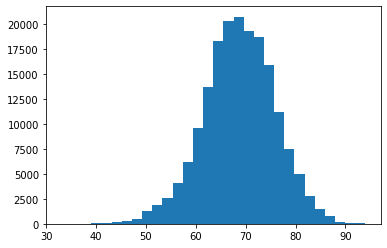

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(target,30,range=(33,94))

Since the distribution of target column seems normal distribution. We will go for mean value imputation fo missing values

In [9]:
y = target.fillna(target.mean())

In [10]:
df.isna().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

  We will remove id and date from this dataset and will perform one hot encoding for the categorical features

In [11]:
df = df.drop(columns=['id','date','player_fifa_api_id','player_api_id','overall_rating'])
df.head()

,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [12]:
from sklearn.preprocessing import LabelEncoder


# creating instance of labelencoder
labelencoder = LabelEncoder()
#preferred_foot	attacking_work_rate	defensive_work_rate

df.preferred_foot = labelencoder.fit_transform(df['preferred_foot'].fillna('0'))
#

In [13]:
df.attacking_work_rate = labelencoder.fit_transform(df['attacking_work_rate'].fillna('0'))
df.defensive_work_rate = labelencoder.fit_transform(df['defensive_work_rate'].fillna('0'))

let's fill all the  missing values  with mean 

In [14]:
for col in df.columns:
  df[col].fillna(df[col].mean(),inplace=True)

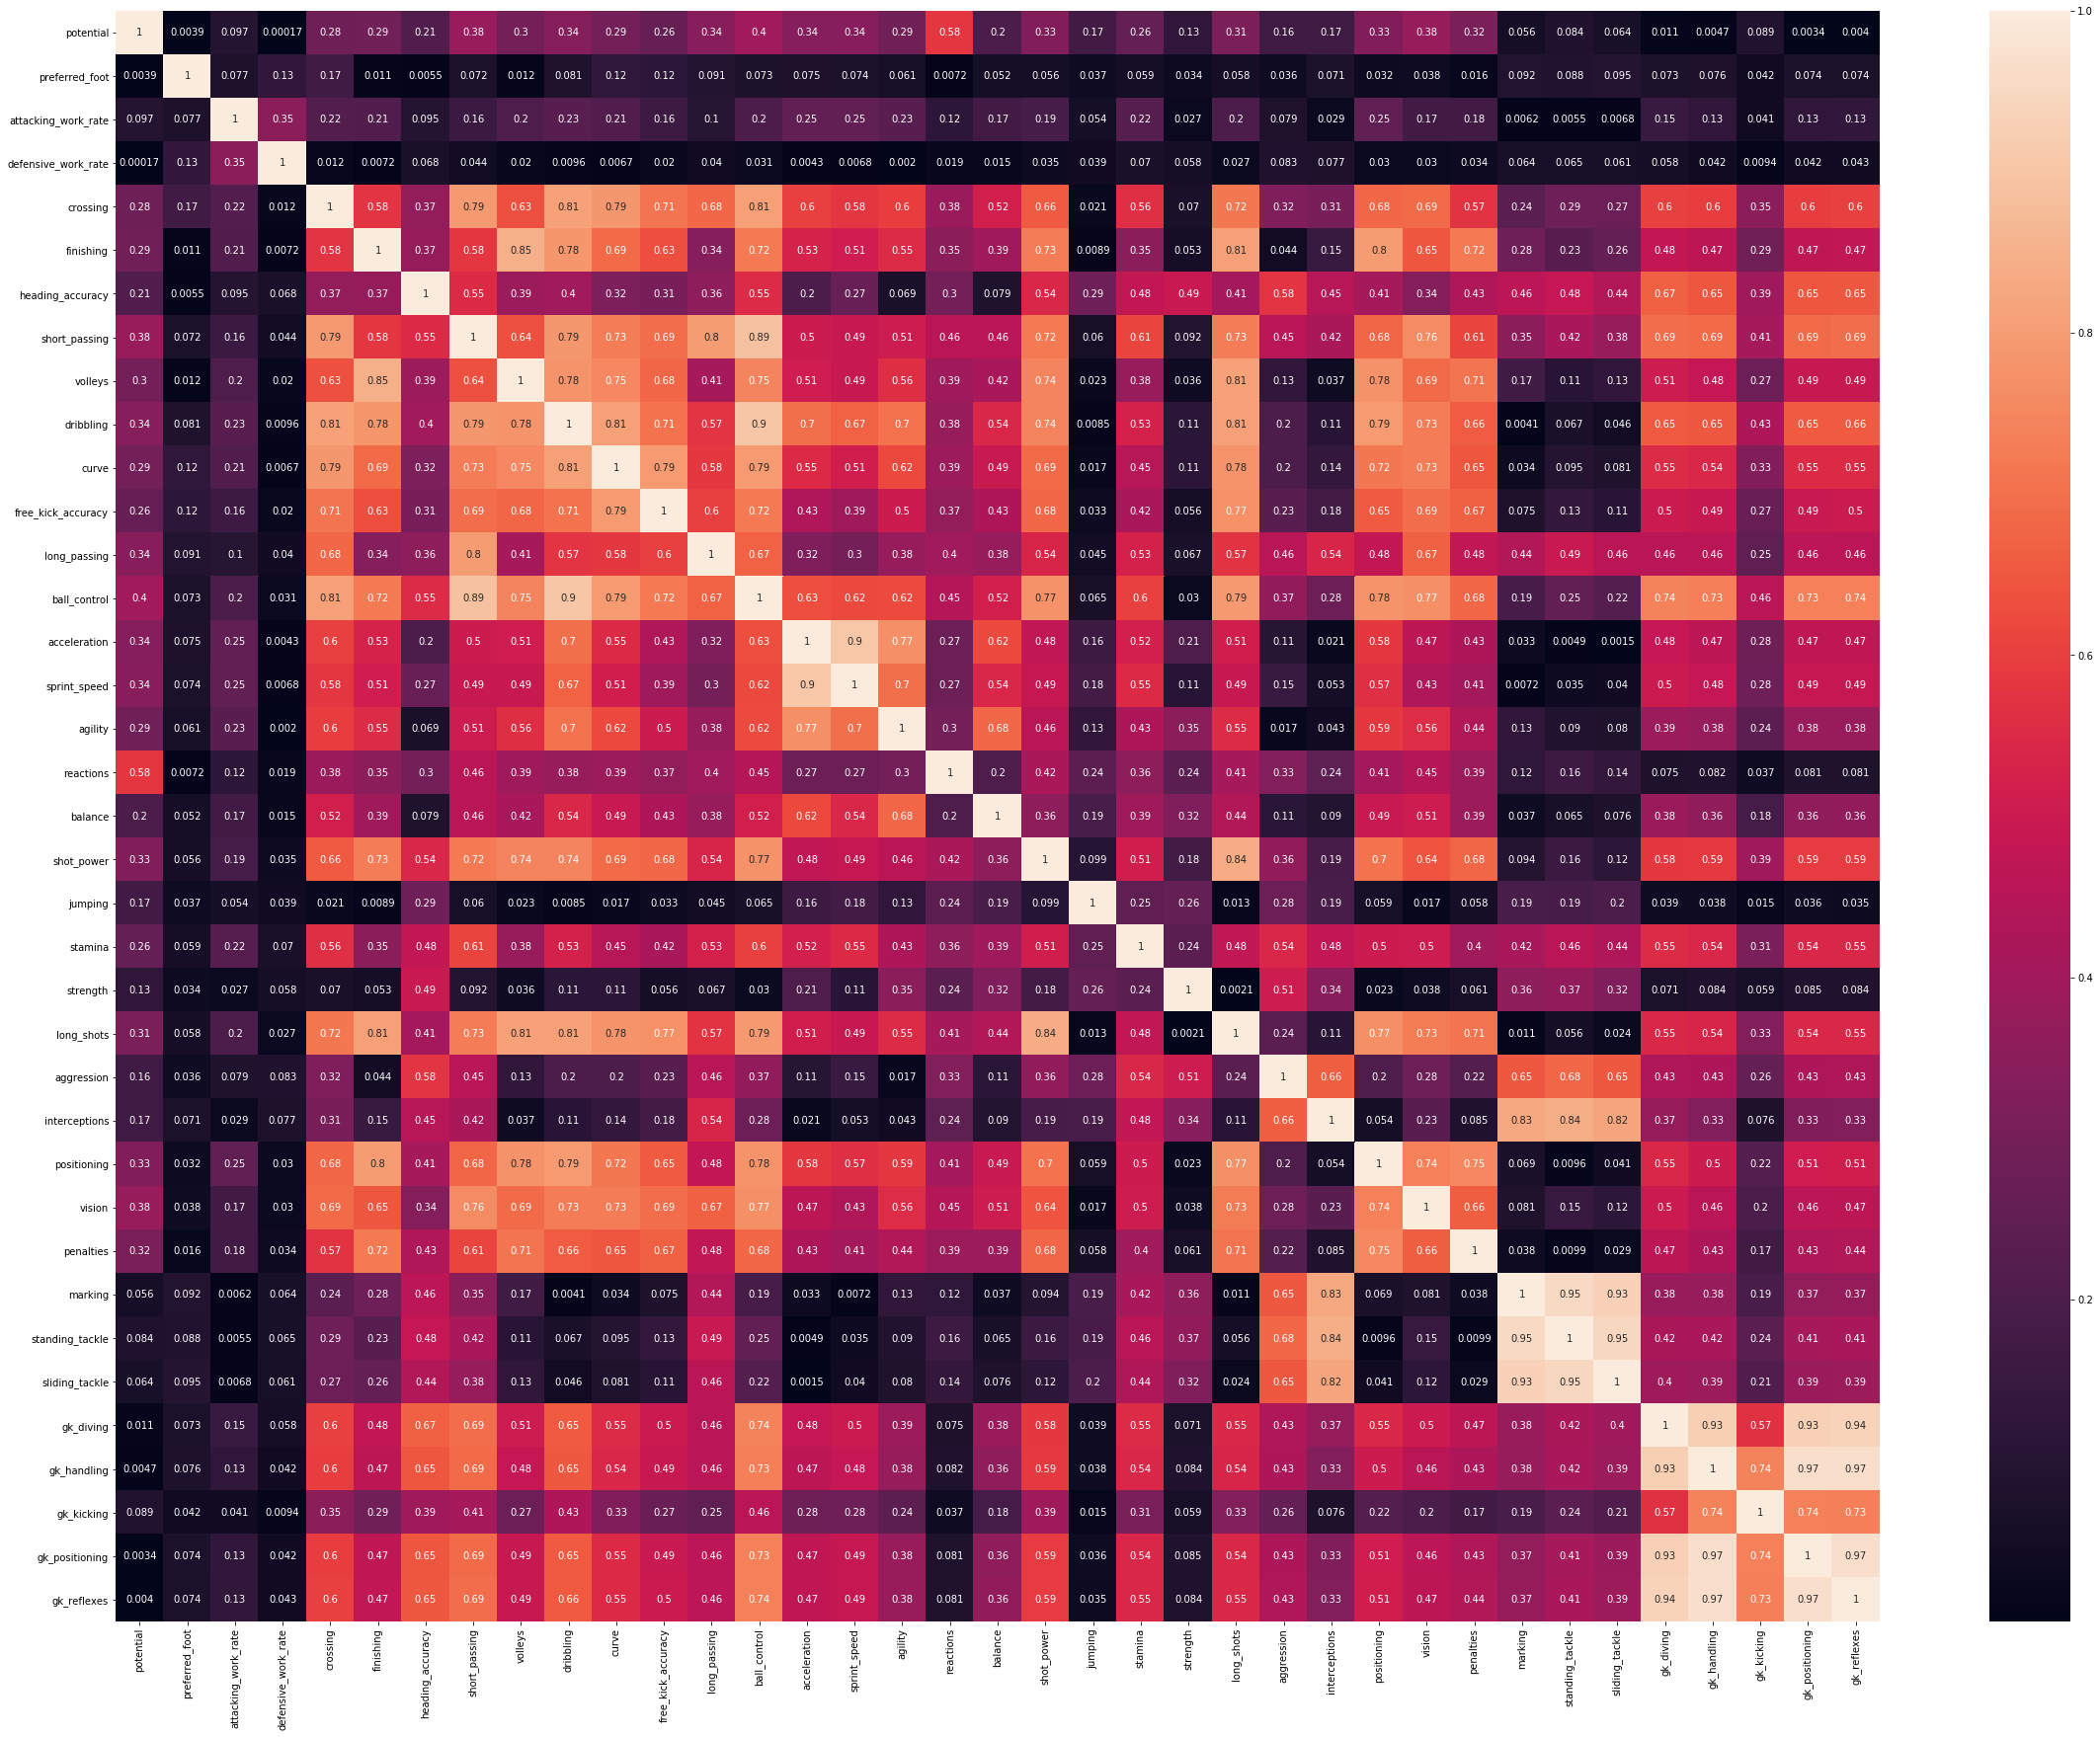

In [15]:
import seaborn as sns

plt.figure(figsize=(40, 30))
sns.heatmap(df.corr().abs(),  annot=True)

Here we can visualize that columns like curve,marking,standing_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning are highly correlated. Let's remove it.



In [16]:
df.columns

Index(['potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [17]:
df = df.drop(columns=['curve','marking','standing_tackle','gk_diving','gk_handling','gk_kicking','gk_positioning'])

let's check for collinearity for by calculating VIF.

Before that we will try

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


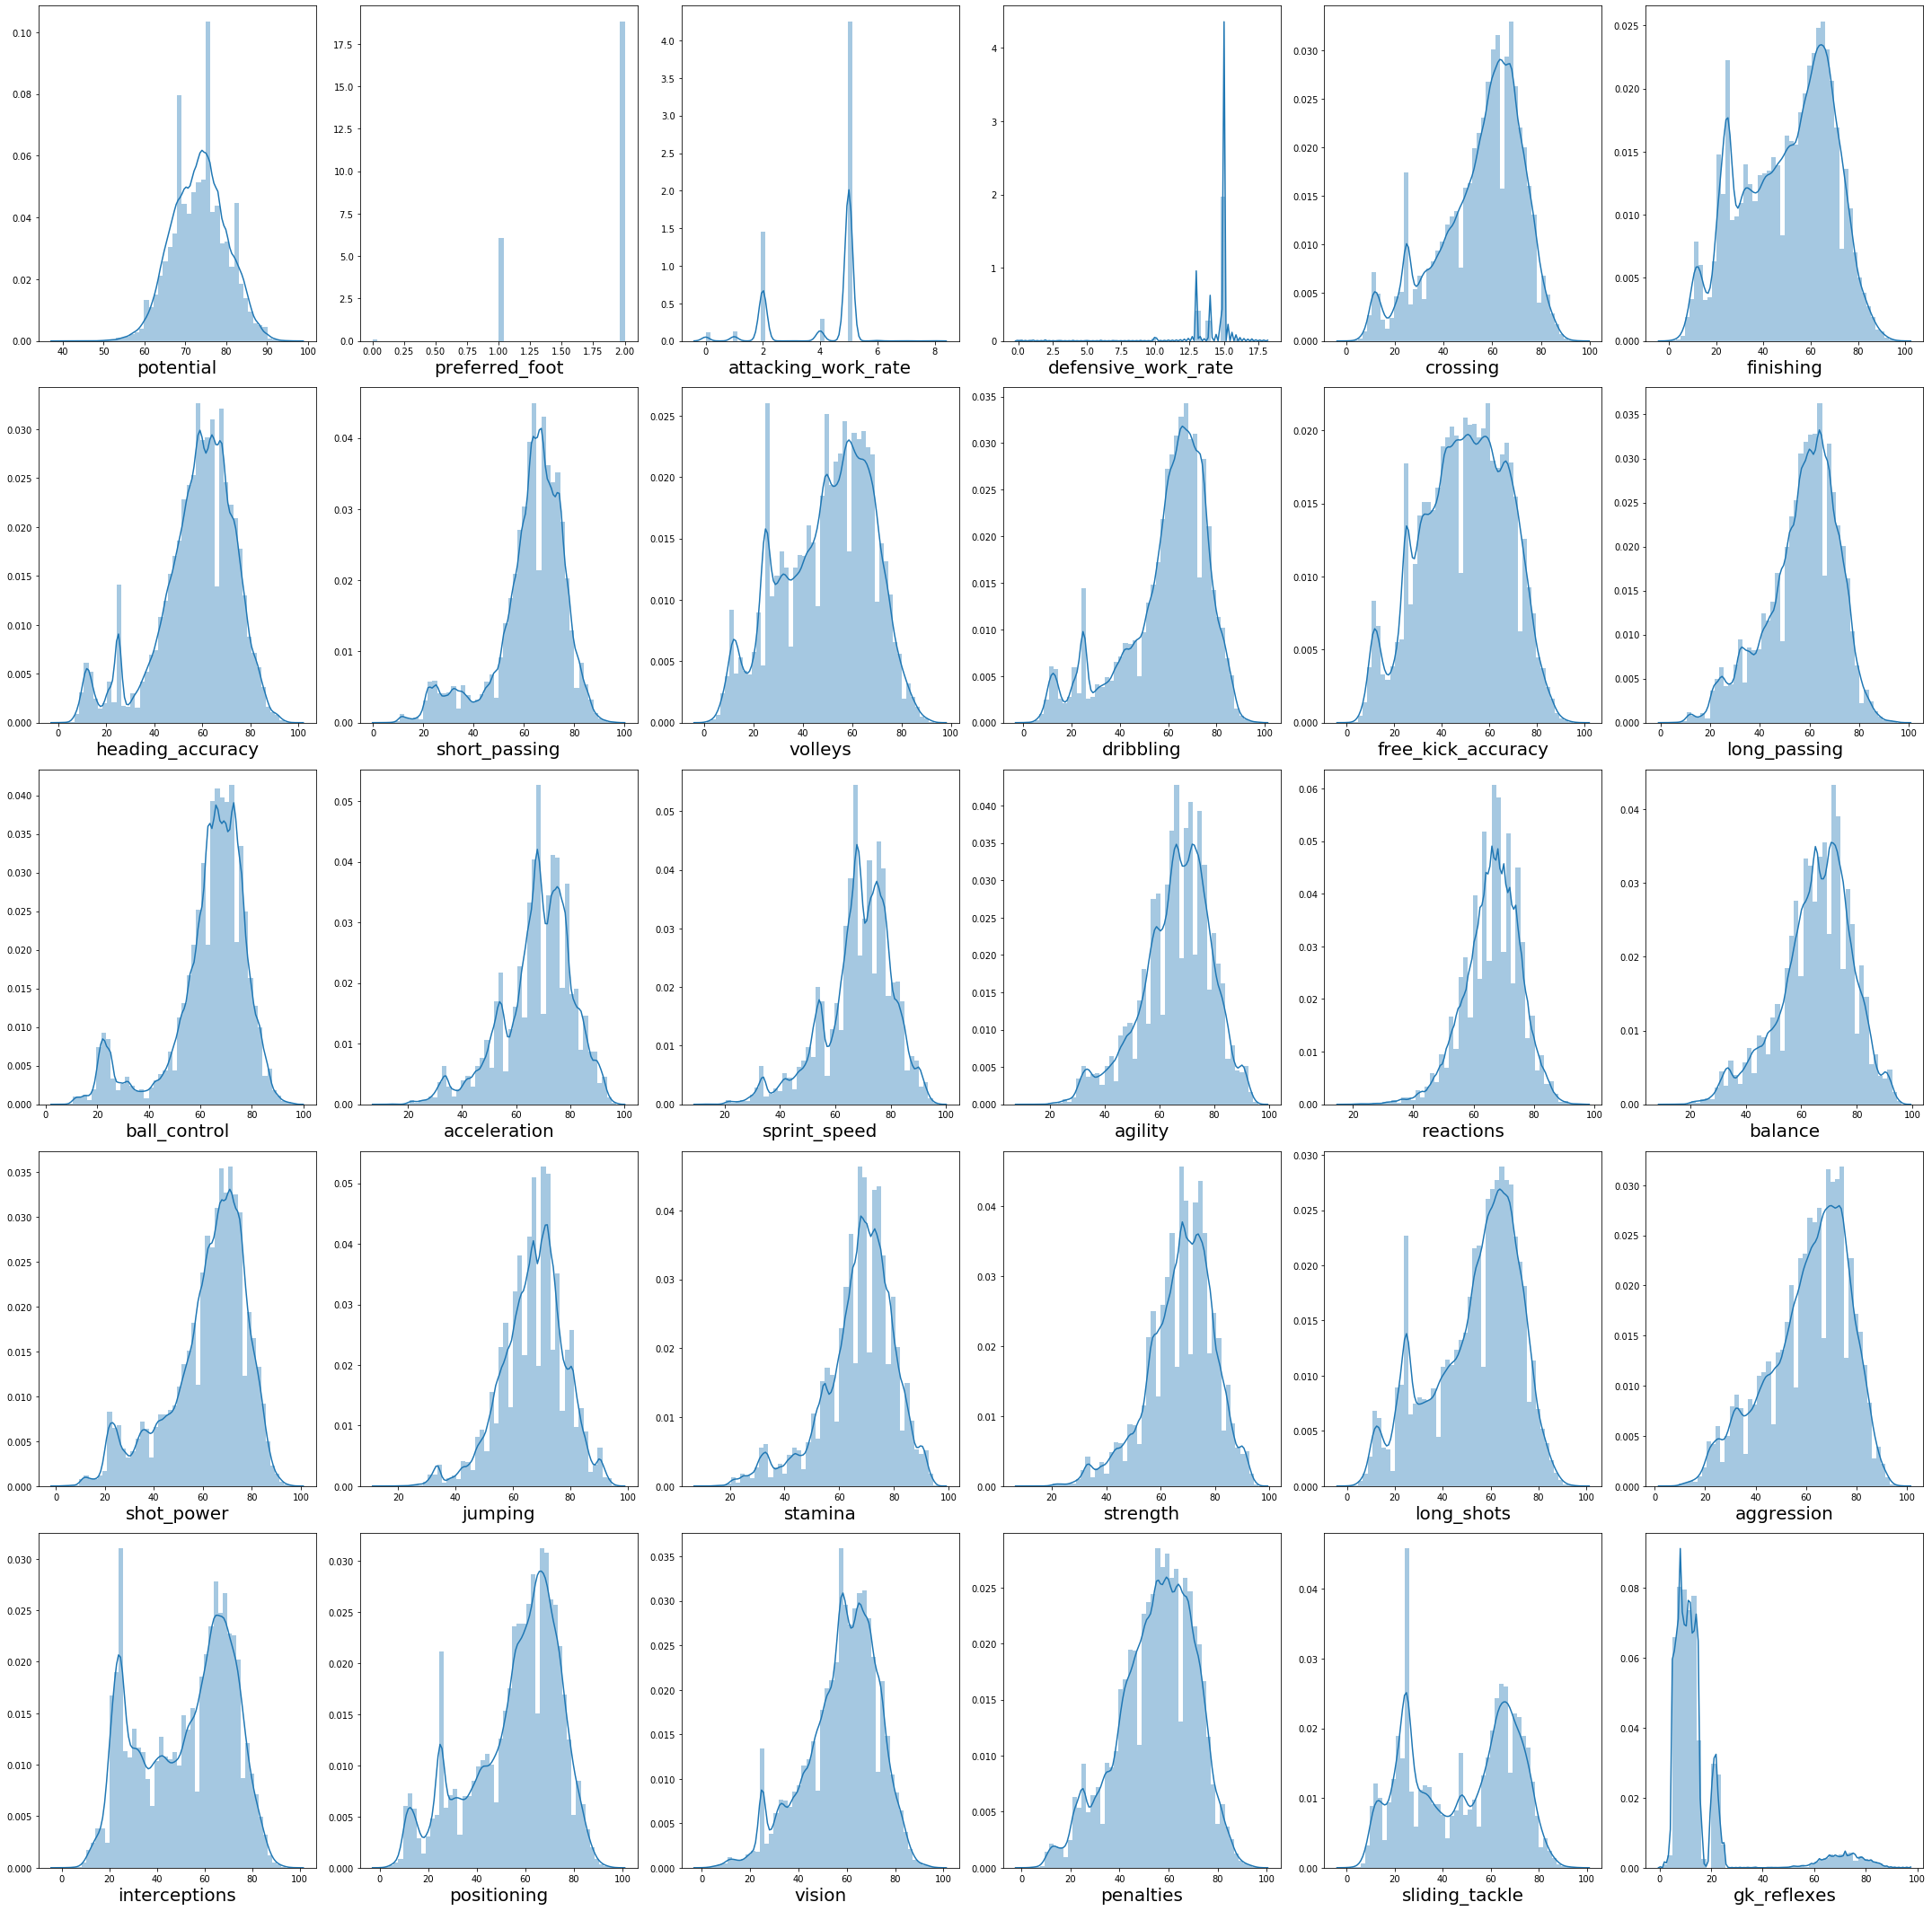

In [18]:
# let's see how data is distributed for every column
plt.figure(figsize=(30,35), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=30 :
        ax = plt.subplot(6,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)


from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df_scaled

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif["Features"] = df.columns

In [20]:
vif

,VIF,Features
0,2.077692,potential
1,1.091105,preferred_foot
2,1.285531,attacking_work_rate
3,1.191214,defensive_work_rate
4,4.638277,crossing
5,6.961644,finishing
6,3.869712,heading_accuracy
7,8.671198,short_passing
8,4.898275,volleys
9,9.651703,dribbling


Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity.

We have 8 columns having vif > 5

*   gk_reflexes  is nearby 5
*   acceleartion, finishing around 7
*   ball control more than 12
*   dribbling more than 9
*   short_passing more than 8
*   sprint_speed,long_shots are  nearby 6








We will drop those columns

In [21]:
df = df.drop(columns=['sprint_speed','long_shots','gk_reflexes','acceleration','finishing','dribbling','short_passing','ball_control'])

X = scaler.fit_transform(df)

Let's try to split the train test data

In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=355)

In [23]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
import pickle

**Linear Regression**

In [24]:

pipe = make_pipeline(LinearRegression())           #estimator(linear regression)

cv = ShuffleSplit(random_state=0)   #defining type of cross_validation(shuffle spliting)

param_grid = {'linearregression__n_jobs': [-1]}     #parameters for model tunning

grid = GridSearchCV(pipe, param_grid=param_grid, cv=cv)

In [25]:
grid.fit(x_train, y_train) 

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=None, train_size=None),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'linearregression__n_jobs': [-1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [26]:

grid.best_params_

{'linearregression__n_jobs': -1}

In [27]:
lin_reg = pickle.dumps(grid)

**Decision Tree**

In [28]:
pipe = make_pipeline(DecisionTreeRegressor(criterion='mse', random_state=0))          #estimator

cv = ShuffleSplit(n_splits=10, random_state=42)        #cross validation

param_grid = {'decisiontreeregressor__max_depth': [3, 5, 7, 9, 13]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=cv)

In [29]:

grid.fit(x_train, y_train)  

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=None, train_size=None),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('decisiontreeregressor',
                                        DecisionTreeRegressor(ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features=None,
                                                              max_leaf_nodes=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split=None,
                                                              min_samples_leaf=1,
                                                              min_samples_split=2,
                            

In [30]:
grid.best_params_

{'decisiontreeregressor__max_depth': 13}

In [31]:
dt_reg = pickle.dumps(grid)

**Random Forest**

In [32]:
pipe = make_pipeline(RandomForestRegressor(n_estimators=500, random_state=123))

cv = ShuffleSplit(test_size=0.2, random_state=0)

param_grid = {'randomforestregressor__max_features':['sqrt', 'log2', 10],
              'randomforestregressor__max_depth':[9, 11, 13]}                 

grid = GridSearchCV(pipe, param_grid=param_grid, cv=cv)

In [33]:
grid.fit(x_train, y_train)  

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split=...
                                     

In [34]:
grid.best_params_

{'randomforestregressor__max_depth': 13,
 'randomforestregressor__max_features': 10}

In [35]:
rf_reg = pickle.dumps(grid)

In [38]:
linr = pickle.loads(lin_reg)
dtr = pickle.loads(dt_reg)
rfr = pickle.loads(rf_reg)

In [42]:
print("""Random Forest regression accuracy is {random_forest}""".format(random_forest=rfr.score(x_test, y_test)))

Random Forest regression accuracy is 0.9374439604280086


In [41]:
print("""Linear regression accuracy is {linear}""".format(linear=linr.score(x_test, y_test)))

Linear regression accuracy is 0.788739103393489


In [43]:
print("""Decision Tree regressor accuracy is {decision}""".format(decision=dtr.score(x_test, y_test)))

Decision Tree regressor accuracy is 0.8969176168497709
